# Practice 01

**1.** Select data from the **payment** table where only the payment types "voucher" and "boleto" appear.   
**2.** Return only **reviews** that have no comments.   
**3.** Return **orders** that were made in the year 2017 only.    
**4.** Find **customers** from the state of SP and who do not live in the city of São Paulo.

## Imports

In [1]:
from IPython.core.display import HTML
from IPython.display      import Image

In [2]:
# personal notebook settings
display(HTML('<style>.container{width:98% !important;}</style>'))

## Connect and Load

In [3]:
%load_ext sql 
%sql sqlite:///olist_datasets.db

## Schema

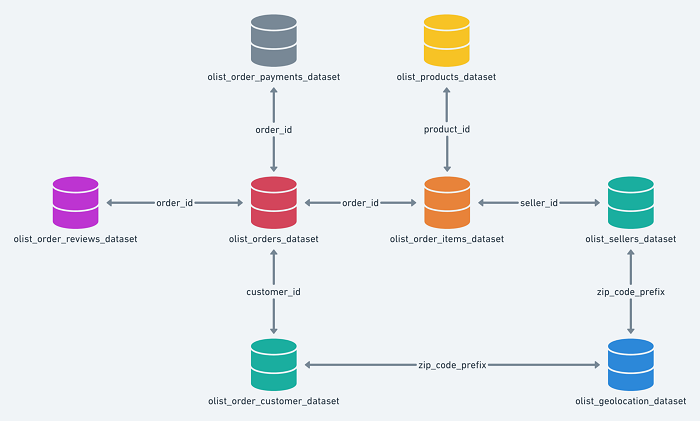

In [4]:
Image('images/schema_resized.png')

## Requests

In all queries, "LIMIT" was used to ensure fast processing and best visualization.

**1. Select data from the payment table where only the payment types "voucher" and "boleto" appear.**   

In [5]:
%%sql 
SELECT *
FROM olist_order_payments_dataset
WHERE payment_type LIKE '%ouche%'
OR payment_type LIKE '%olet%'
LIMIT 10; 

 * sqlite:///olist_datasets.db
Done.


order_id,payment_sequential,payment_type,payment_installments,payment_value
0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95
8cd68144cdb62dc0d60848cf8616d2a4,1,boleto,1,330.66
5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
b69b9260e79a0da00e15f48de1bd2524,1,boleto,1,283.34
00d8d65b666158b633f96054d31af43b,1,boleto,1,130.88
32b1d8f3789a57f1f752e20ac7404b4c,1,boleto,1,56.6
56c3277583e16009c925fdf116df420f,1,boleto,1,31.38
1ffb3c1929b16d9c1aec1958e11b3e9b,1,boleto,1,166.04
95442deb81a5d91c97c0df96b431634a,1,boleto,1,368.98
10d9871bed9fb8d0887d3b9022edd1ff,1,boleto,1,84.14


The use of the '%' helps in identifying special characters within our database. If you have any capital letters, it will pull them in the same way.

**2. Return only reviews that have no comments.**  

In [6]:
%%sql
SELECT * 
FROM olist_order_reviews_dataset 
WHERE review_comment_title ISNULL  
AND review_comment_message ISNULL
LIMIT 10; 

 * sqlite:///olist_datasets.db
Done.


review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,None,None,2018-04-13 00:00:00,2018-04-16 00:39:37
07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,None,None,2017-07-16 00:00:00,2017-07-18 19:30:34
7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,None,None,2018-08-14 00:00:00,2018-08-14 21:36:06
a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,None,None,2017-05-17 00:00:00,2017-05-18 12:05:37
c9cfd2d5ab5911836ababae136c3a10c,cdf9aa68e72324eeb25c7de974696ee2,5,None,None,2017-12-23 00:00:00,2017-12-26 14:36:03
96052551d87e5f62e6c9f6974ec392e9,3d374c9e46530bb5ed4a7648915306a6,5,None,None,2017-12-19 00:00:00,2017-12-20 10:25:22
23f75a37effc35d9a915b4e1ad483793,2eaf8e099d871cd5c22b83b5ea8f6e0e,4,None,None,2018-03-28 00:00:00,2018-03-30 15:10:55


**3. Return orders that were made in the year 2017 only.**  

In [7]:
%%sql
SELECT * 
FROM olist_orders_dataset
WHERE order_purchase_timestamp LIKE '2017%'
LIMIT 10;

 * sqlite:///olist_datasets.db
Done.


order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,None,None,2017-05-09 00:00:00
6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00
e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00
34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08 00:00:00
116f0b09343b49556bbad5f35bee0cdf,3187789bec990987628d7a9beb4dd6ac,delivered,2017-12-26 23:41:31,2017-12-26 23:50:22,2017-12-28 18:33:05,2018-01-08 22:36:36,2018-01-29 00:00:00


**4. Find customers from the state of São Paulo and who do not live in the city of São Paulo.**

In [8]:
%%sql
SELECT * 
FROM olist_customers_dataset
WHERE customer_state = 'SP'
AND customer_city != 'sao paulo'
LIMIT 10;

 * sqlite:///olist_datasets.db
Done.


customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP
206f3129c0e4d7d0b9550426023f0a08,21f748a16f4e1688a9014eb3ee6fa325,13412,piracicaba,SP
c5c61596a3b6bd0cee5766992c48a9a1,b6e99561fe6f34a55b0b7da92f8ed775,7124,guarulhos,SP
f681356046d9fde60e70c73a18d65ea2,5f102dd37243f152aec3607970aad100,9121,santo andre,SP
261cb4f92498ca05d5bd1a327a261d9c,424aca6872c5bab80780a8dec03b7516,12235,sao jose dos campos,SP
6f92779347724b67e44e3224f3b4cffd,bf4862777db128507e9efcc789215e9b,18130,sao roque,SP
